# 三维向量

## 向量加法

In [29]:
def add(*vectors):
    return tuple(map(sum, zip(*vectors)))

add((3, 3, 5), (2, 4, 8))

(5, 7, 13)

### 练习3.5
求24个向量列表的和

In [30]:
from math import *

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(24)] # 生成24个向量

ans = (0, 0, 0)
for v in vs:
    ans = add(ans, v)
    
print(ans)

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


## 标量乘法

In [31]:
def scale(scalar, vector):
    return tuple(coord * scalar for coord in vector)

scale(2, (5, 8, 2))

(10, 16, 4)

## 向量长度

In [32]:
from math import *

def length(vector):
    return sqrt(sum(coord ** 2 for coord in vector))

length((1, 1, 1))

1.7320508075688772

## 向量减法

In [33]:
def subtract(v1, v2):
    return tuple((v1[0]-v2[0], v1[1]-v2[1], v1[2]-v2[2]))

subtract((3, 3, 7), (2, 5, 8))

(1, -2, -1)

## 计算距离

In [34]:
def distance(v1, v2):
    return length(subtract(v1, v2))

distance((2, 2, 3), (1, 1, 2))

1.7320508075688772

## 向量相乘

### 点积
* u · v
* 取两个向量相乘，返回一个数字
    * 两向量垂直，点积为0
    * 两向量同向，点积为正，夹角为锐角
    * 两向量反向，点积为负，夹角为钝角
    * 向量越长，点积绝对值越大，向量越短，点积绝对值越小
* 点积计算u · v = ux * vx + uy * vy + uz * vz


In [35]:
def dot(u, v):
    return sum(coord1 * coord2 for coord1, coord2 in zip(u, v))

dot((1, 2, -1), (3, 0, 3))

0

* 点积可以用来计算两个向量的夹角 u · v = |u| · |v| · cos(θ)

In [36]:
from math import *

def angle_between(v1, v2):
    return acos(
        dot(v1, v2) / (length(v1) * length(v2))
    )

angle_between((1, 2, -1), (3, 0, 3)) # pi / 2

1.5707963267948966

* 根据此公式，点积还可以提取坐标在某方向的分量
    * 分量即|v| · cos(θ) = (u · v) / |u|

In [28]:
def component(v, direction):
    return (dot(v, direction) / length(direction))

v = (2, 3, 7)
direction = (1, 0, 0) # 在x轴上的投影分量
component(v, direction)

2.0

* 对u或v做缩放，也会使点积进行相同的缩放

In [31]:
x = (3, 2, 4)
y = (8, 8, 7)

scalar = 5
assert dot(scale(scalar, x), y) == scalar * dot(x, y)
assert dot(x, scale(scalar, y)) == scalar * dot(x, y)
assert dot(scale(scalar, x), scale(scalar, y)) == scalar * scalar * dot(x, y)

### 向量积
* u x v
* 取两个向量相乘，返回一个向量
    * 向量方向按照右手法则垂直于两个输入向量形成的平面
    * 向量长度表示了两个输入向量形成的平行四边形面积
        * 输入向量共线，向量积长度为0
        * 输入向量平行，向量积为（0， 0， 0）
        * 输入向量垂直，向量积长度最大
* 向量积计算u x v = (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy-uy*vx)

In [38]:
def cross(u, v):
    ux, uy, uz = u
    vx, vy, vz = v
    return (uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx)

print(cross((1, 0, 0), (0, 1, 0)))
print(cross((0, 1, 0), (0, 0, 1)))
print(cross((1, 0, 0), (0, 0, 1)))
print(cross((1, 2, 5), (2, 4, 10))) # 平行向量

(0, 0, 1)
(1, 0, 0)
(0, -1, 0)
(0, 0, 0)


* 向量积长度 |u x v| = |u| · |v| · sin(θ)
    * 根据向量积长度表示输入向量拉成的平行四边形面积得来
    * 以此可以计算两个向量间的夹角θ

## 三维在二维上的投影

* 用向量表示一个八面体

In [78]:
octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(-1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, -1)],
]

* 获取八面体的顶点

[(0, 0, -1), (1, 0, 0), (0, -1, 0), (-1, 0, 0), (0, 1, 0), (0, 0, 1)]


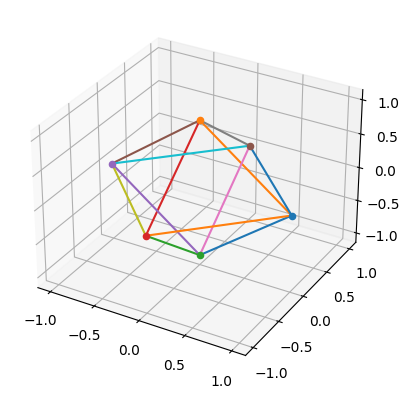

In [114]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

vertices(octahedron)

import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

vectors = vertices(octahedron)
for vector in vectors:
    ax.scatter3D(*vector)

vectors.sort(key=lambda x: x[2])
print(vectors)

for i in range(4):
    ax.plot3D(*zip(vectors[0], vectors[i+1]))
    ax.plot3D(*zip(vectors[i+1], vectors[5]))

ax.plot3D(*zip((0, -1, 0), (-1, 0, 0)))
ax.plot3D(*zip((-1, 0, 0), (0, 1, 0)))
ax.plot3D(*zip((0, 1, 0), (1, 0, 0)))
ax.plot3D(*zip((1, 0, 0), (0, -1, 0)))

* 确定投影平面的“上”和“右”方向单位向量

In [39]:
top = (0, 1, 0) # y轴
right = (1, 0, 0) # x轴

* 将三维向量压平到平面上

In [42]:
def vector_to_2d(v):
    return (component(v, right), component(v, top))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

[face_to_2d(face) for face in octahedron]

[[(1.0, 0.0), (0.0, 1.0), (0.0, 0.0)],
 [(1.0, 0.0), (0.0, 0.0), (0.0, 1.0)],
 [(1.0, 0.0), (0.0, 0.0), (0.0, -1.0)],
 [(1.0, 0.0), (0.0, -1.0), (0.0, 0.0)],
 [(-1.0, 0.0), (0.0, 1.0), (0.0, 0.0)],
 [(-1.0, 0.0), (0.0, 0.0), (0.0, 1.0)],
 [(-1.0, 0.0), (0.0, 0.0), (0.0, -1.0)],
 [(-1.0, 0.0), (0.0, -1.0), (0.0, 0.0)]]

In [ ]:
# 计算一个向量的单位1向量
def unit(v):
    return scale(1./length(v), v) # 将向量根据其长度缩放成单位1向量

# 计算垂直于face面的向量
def normal(face):
    return (cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

## 变换向量和图形

In [118]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

v = (3, 9, 7)
scale_by_3 = scale_by(3)
print(scale_by_3(v))

def translate_by(translation):
    def new_function(v):
        return add(translation, v)
    return new_function

translation = (-1, 0, 0)
translate_left_1 = translate_by(translation) # move left 1
print(translate_left_1(v))

(9, 27, 21)
(2, 9, 7)


## 总结
* 点积可以计算两个向量的夹角，还可以计算向量在另一平面上的分量
* 向量积与输入向量的平面垂直
* 任何三维对象的表面，都可以拆分成小三角形
* 利用三角形的三个点，计算其差值的向量积，即可知道该面的朝向，从而确认该面是否可以被看到
* 也可以利用面的向量积确认该面与光源的夹角，来计算其灰度值，确定明暗